In [48]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [49]:
# Importing the training dataset using pandas dataframe
train = pd.read_excel(r'C:\Users\shahr\OneDrive\Desktop\GithubRepositories\Prediction-of-Flight-Price\Data_Train.xlsx')

# To display all the columns when showing the dataset
pd.set_option('display.max_columns',None)

In [50]:
# Take a look at the head of the data
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [51]:
# Checking the type of data in each columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


The 'price' is the dependent variable and all other columns are independent variables, which are in string format.

In [52]:
# Shape of dataframe
train.shape

(10683, 11)

In [53]:
# Dropping the nan values in the dataset

train.dropna(inplace = True)

train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Exploratory Data Analysis

As the first step, there are some features that are in string format but there are valuable information that can be extracted from them. For these features, it is needed to convert datatype to timestamp by using pandas to_datetime.


From the 'Date_of_Journey' we can take out the 'day' and 'month' that are valuable information.

From 'Arrival_Time' we can extract 'hour', 'day', and 'month'.

From 'Dep_Time' we can extract the 'hour' and 'minute' separately.

In [54]:
# Analyzing 'Date_of_Journey' and taking out 'day of journey' and 'month of journey'.
# .dt.day method will extract only the day of a specific date
# .dt.month method will extract only month of a specific date

train['Journey_day'] = pd.to_datetime(train['Date_of_Journey'], format = '%d/%m/%Y').dt.day
train['Journey_month'] = pd.to_datetime(train['Date_of_Journey'], format = '%d/%m/%Y').dt.month
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


From the feature 'Date_of_Journey' we extracted the valuable information of day and month of the journey. Here we have only the data of year 2019, so we don't need the year of journey as a new feature. Now, we can remove the feature of 'Date_of_Journey' as it is converted into integers of 'Journey_day' and 'Journey_month'. We need to do the same with the test set.

In [55]:
# Dropping the 'Date_of_Journey'
train.drop(['Date_of_Journey'], axis=1, inplace= True)

In [56]:
# Analyzing 'Dep_Time' and taking out 'hour' and 'minute'.
# .dt.hour method will extract only the hour of a specific time
# .dt.minute method will extract only minute of a specific time

train['Dep_hour'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_minute'] = pd.to_datetime(train['Dep_Time']).dt.minute

# After extracting hour and minute, it is possible to drop 'Dep_Time' feature
train.drop('Dep_Time', axis =1, inplace = True)

In [57]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [58]:
# Analyzing 'Arrival_Time' and taking out 'hour' and 'minute'.

train['Arrival_hour'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute

# After extracting hour and minute, it is possible to drop 'Arrival_Time' feature
train.drop('Arrival_Time', axis=1,inplace=True)

In [59]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


So far, we analyzed three features of 'Date_of_Journey', 'Dep_Time', and 'Arrival_Time'. As the next step, the feature of 'Duration' is analyzed.

Due to the format of 'Duration' feature, it is needed to convert data into a suitable format to extract duration hours and duration minutes.

In [60]:
# Assigning and converting duration column into list

duration = list(train['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' ' +'0m' #Adding 0 minute to unify the format of duration
        else:
            duration[i] = '0h' + ' ' + duration[i] #Adding 0 hour to unify the format of duration

duration_hours = []
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_minutes.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [61]:
# Adding 'duration_hours' and 'duration_minutes' to the dataset.

train['Duration_hours'] = duration_hours
train['Duration_minutes'] = duration_minutes

# After extracting hour and minute, it is possible to drop 'Duration' feature
train.drop('Duration', axis=1,inplace=True)

train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


#### Handling Categorical Features

Categorical features are in two types of 'Nominal data' and 'Ordinal data'.
1. The order of data is not important in 'Nominal' features and in this case 'OneHotEncoder' is used for handling it (like the destination, airline, and  source features of the given dataset).


2. The order of data is important in 'Ordinal' features and in this case 'LabelEncoder' is used to handle it.

In [62]:
# Analyzing 'Airline' feature. This feature is a Nominal categorical feature
#that we can use onehotencoder for analyzing it.

train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

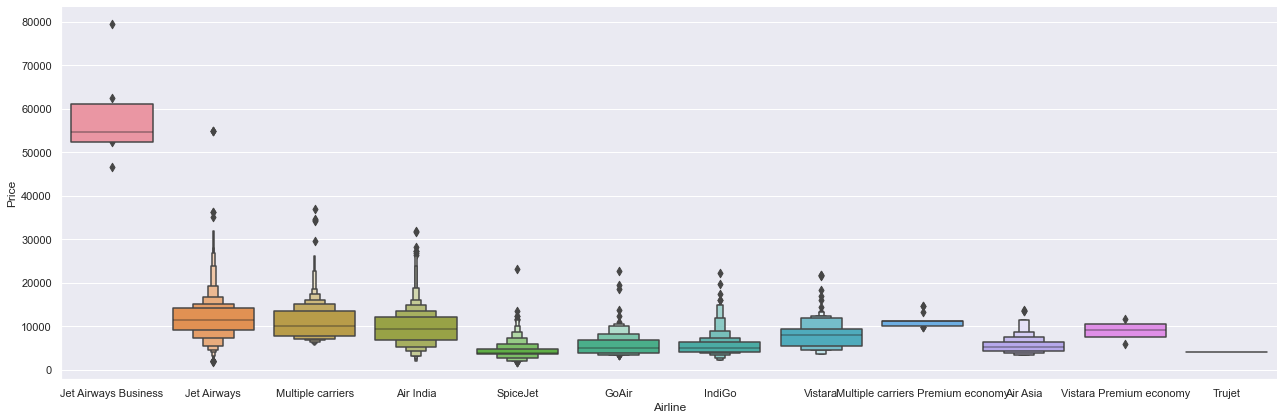

In [63]:
# Plotting the categories of Airline over the ticket price to get
# a better understanding of data

sns.catplot(y='Price',x = 'Airline', data = train.sort_values('Price',ascending= False), kind= 'boxen', height = 6, aspect = 3)
plt.show()

The above figure shows that 'Jet Airways' has a higher median price compare to other airlines.

As 'Airline' feature is a Nominal Categorical Feature, I performed OneHotEncoding to extract the proper data for model training.

In [64]:
# OneHotEncoding technique
Airline = train[['Airline']]
Airline = pd.get_dummies(Airline, drop_first= True)
# We can drop the first column, as when the other columns are zero, it means
# the remaining column (category) is one. So, it is not necessary to have that.
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [65]:
# After analyzing the 'Airline' feautre, I analyzed 'Source' feature.
# Source is a Nominal categorical feature as the order of the categories is not important.
# So, it is feasible to use OneHotEncoding to extract required metrics.

train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

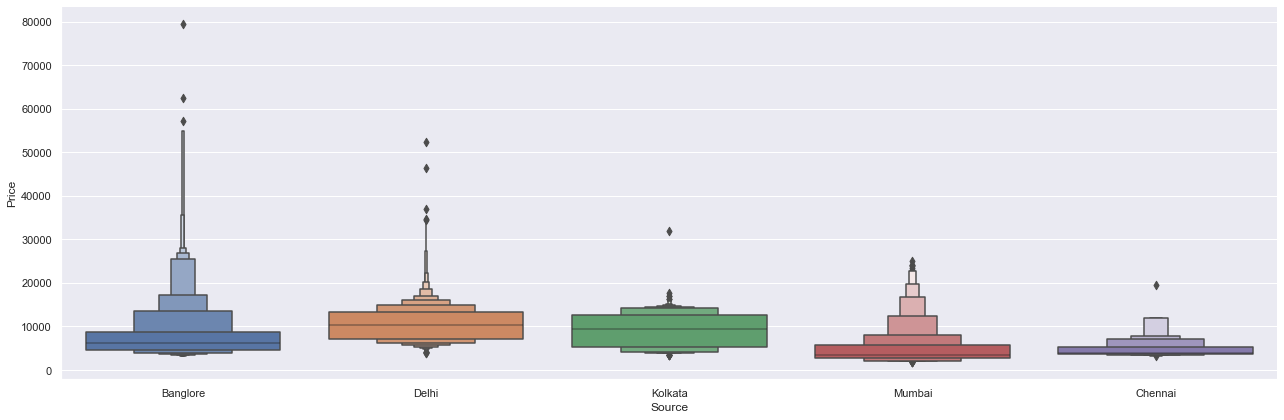

In [66]:
# Plotting Source vs. Price to get a better visualization and understanding of data.

sns.catplot(y='Price',x = 'Source', data = train.sort_values('Price',ascending= False), kind= 'boxen', height = 6, aspect = 3)
plt.show()

In [67]:
# Applying onehotencoding over the 'Source' feature.

Source = train[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [68]:
# Analyzing the 'Destination' feature.
train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

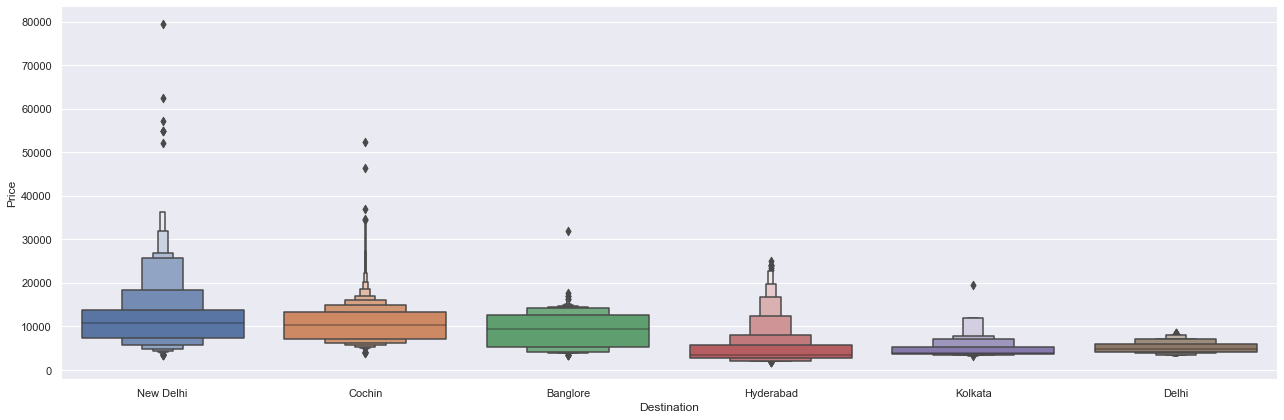

In [69]:
# Plotting destination vs. Price

sns.catplot(y='Price',x = 'Destination', data = train.sort_values('Price',ascending= False), kind= 'boxen', height = 6, aspect = 3)
plt.show()

In [70]:
# Using OneHotEncoding
Destination = train[['Destination']]
Destination = pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [71]:
# Analyzing the 'Route' feature.
# First get a better understanding of the feature and its information
train['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [73]:
train['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

It can be seen that the information from the 'Route' feature is the same information as the number of stops. So it is possible to drop the 'Route' feature as we already have its information in the number of stops feature.

In [74]:
# Analyzing the 'Additional_Info' feature.
train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

As almost 80% of the data from the 'Additional_Info' feature is about 'No info', so it is better to remove this feature.

In [75]:
# Removing two features of 'Additional_Info' and 'Route' as discussed earlier.

train.drop(['Additional_Info','Route'],axis = 1, inplace = True)
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [76]:
# Analyzing the feature of 'Total_Stops'.
# 'Total_Stops' is an ordinal categorical feature.
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [79]:
# Applying LabelEncoder
# As the numebr of stop increases,
#we are going to assign a label encoder with a higher value.

train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace= True)
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


After handling the categorical features, it is needed to Concatenate all the information that extracted from the categorical features with the training data.

In [80]:
# Concatenate dataframe

train = pd.concat([train,Airline,Source,Destination], axis = 1)
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [81]:
# Dropping the categorical features that we have already extracted their information.
train.drop(['Airline','Source','Destination'], axis = 1, inplace = True)
train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [82]:
train.shape

(10682, 30)

### Preprocessing the Test Dataset
###### We shouldn't combine the test and training data together and apply the preprocessing because of data leakage. Which makes the model familiar with some of the unseen data in the dataset. So, the model wouldn't be trained in a correct way based on the training dataset.

In [89]:
# Importing the testing dataset using pandas dataframe
test = pd.read_excel(r'C:\Users\shahr\OneDrive\Desktop\GithubRepositories\Prediction-of-Flight-Price\Test_set.xlsx')

# To display all the columns when showing the dataset
pd.set_option('display.max_columns',None)

In [90]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [91]:
# Just repeating the same process like what we did for the test set.
# Processing the numerical data
test.dropna(inplace = True)

test['Journey_day'] = pd.to_datetime(test['Date_of_Journey'], format = '%d/%m/%Y').dt.day
test['Journey_month'] = pd.to_datetime(test['Date_of_Journey'], format = '%d/%m/%Y').dt.month

test.drop(['Date_of_Journey'], axis=1, inplace= True)


test['Dep_hour'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_minute'] = pd.to_datetime(test['Dep_Time']).dt.minute

test.drop('Dep_Time', axis =1, inplace = True)


test['Arrival_hour'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arrival_min'] = pd.to_datetime(test['Arrival_Time']).dt.minute

test.drop('Arrival_Time', axis=1,inplace=True)


duration = list(test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' ' +'0m' #Adding 0 minute to unify the format of duration
        else:
            duration[i] = '0h' + ' ' + duration[i] #Adding 0 hour to unify the format of duration

duration_hours = []
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_minutes.append(int(duration[i].split(sep = 'm')[0].split()[-1]))


test['Duration_hours'] = duration_hours
test['Duration_minutes'] = duration_minutes

# After extracting hour and minute, it is possible to drop 'Duration' feature
test.drop('Duration', axis=1,inplace=True)

test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [92]:
# Processing the categorical data of test set

Airline = test[['Airline']]
Airline = pd.get_dummies(Airline, drop_first= True)

Source = test[['Source']]
Source = pd.get_dummies(Source, drop_first = True)

Destination = test[['Destination']]
Destination = pd.get_dummies(Destination, drop_first= True)

test.drop(['Additional_Info','Route'],axis = 1, inplace = True)

test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace= True)

test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [93]:
# Concatenating the test data with the categorical features

test = pd.concat([test,Airline,Source,Destination], axis = 1)
test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [94]:
# Removing the categorical features as we have already extracted the information from them.
test.drop(['Airline','Source','Destination'],axis = 1,inplace = True)
test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [95]:
test.shape

(2671, 28)

## Feature Selection

After preprocessing the data, data exploratory analysis, and feature engineering, it is time to select appropriate features. Selecting the features that will contribute and have good relation with the target variable.

##### Some of the feature selection methods:
1. Heatmap
2. Feature importance
3. SelectKBest

Note: Feature scaling is based on the type of machine learning algorithm, so feature scaling will be applied in the model training part.

In [96]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [101]:
# Creating a new dataset and removing the dependent feature 'Price' for feature selection
X = train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month','Dep_hour',
                 'Dep_minute', 'Arrival_hour', 'Arrival_min', 'Duration_hours','Duration_minutes',
                 'Airline_Air India', 'Airline_GoAir','Airline_IndiGo',
                 'Airline_Jet Airways', 'Airline_Jet Airways Business','Airline_Multiple carriers',
                 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
                 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
                 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
                 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
                 'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [109]:
# Creating another dataset containing only the dependent feature 'Price'

y = train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

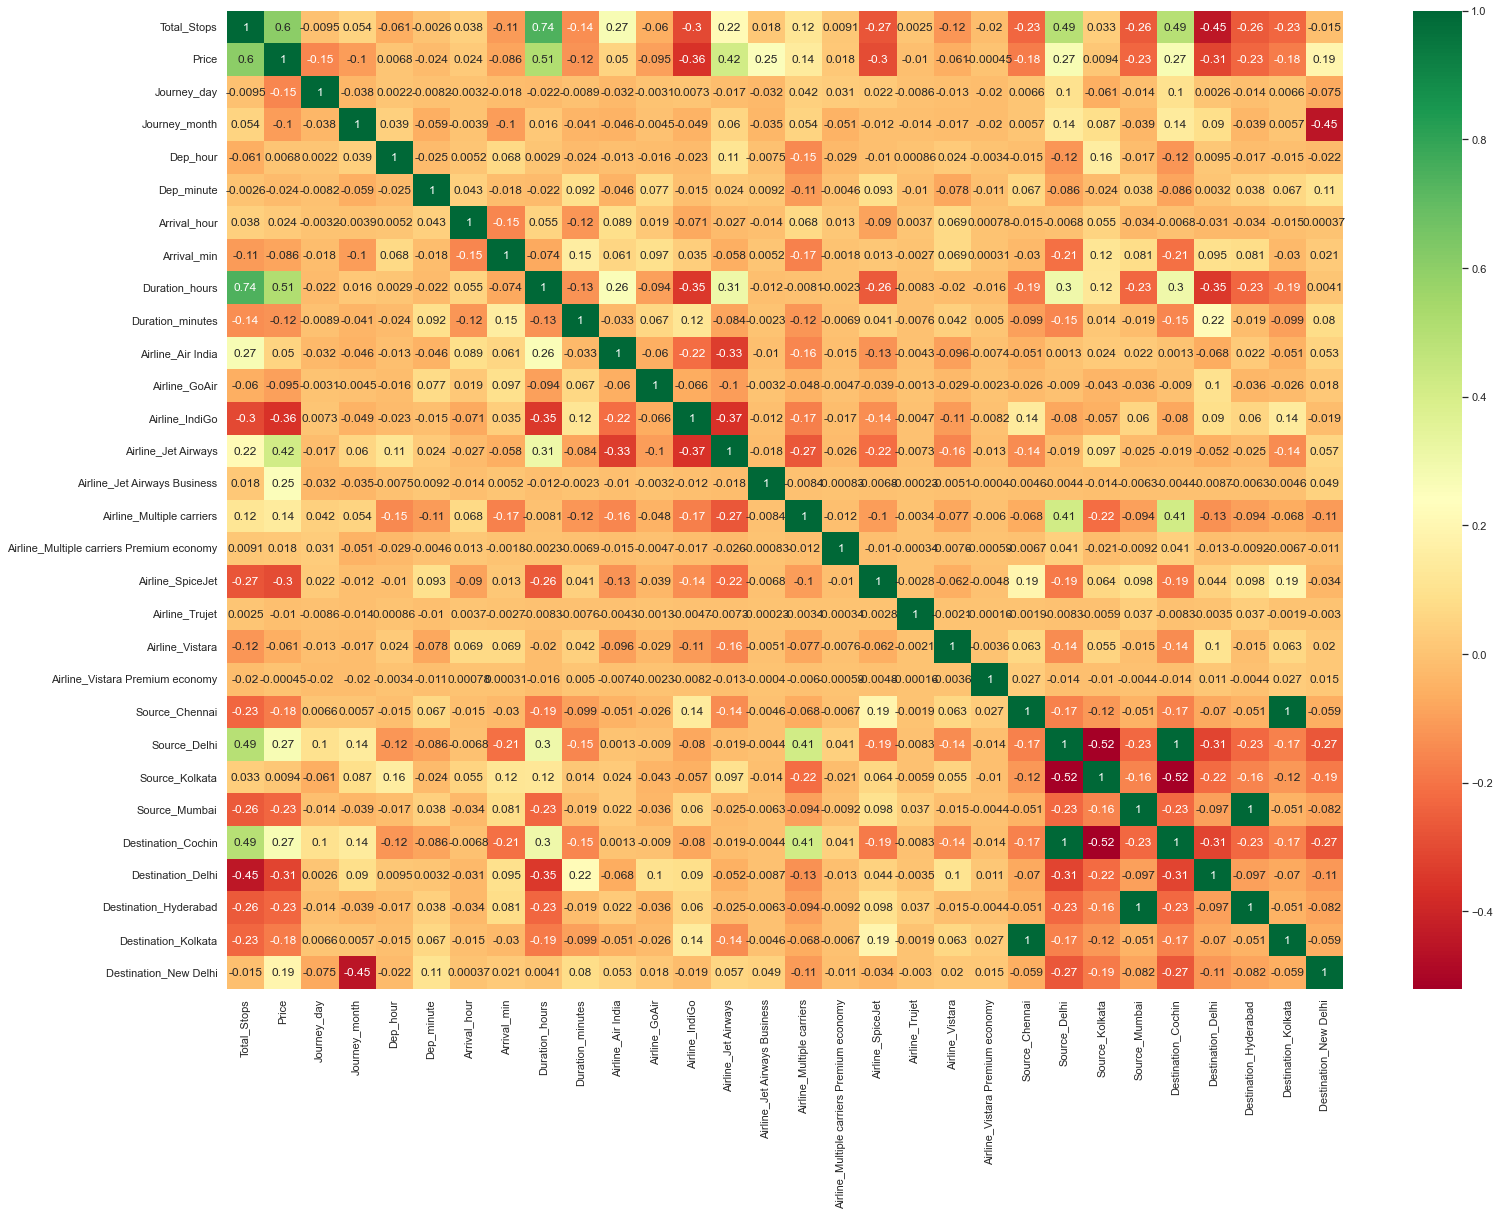

In [116]:
# Finding the correlation between independent and dependent features using heatmap

plt.figure(figsize= (25,18))
sns.heatmap(train.corr(), annot = True, cmap= 'RdYlGn')
plt.show()

Heatmap plot shows the correlation between the features and also between the features and the labels. One application of the heatmap is that, when two features are highly correlated with each other, you can write a code and remove one of them. Because both of the features have almost the same impact on the target variable.

Here, I used ExtraTreesRegressor, which is fitted on the data and the labels and determines the important features.

In [117]:
# Importing ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

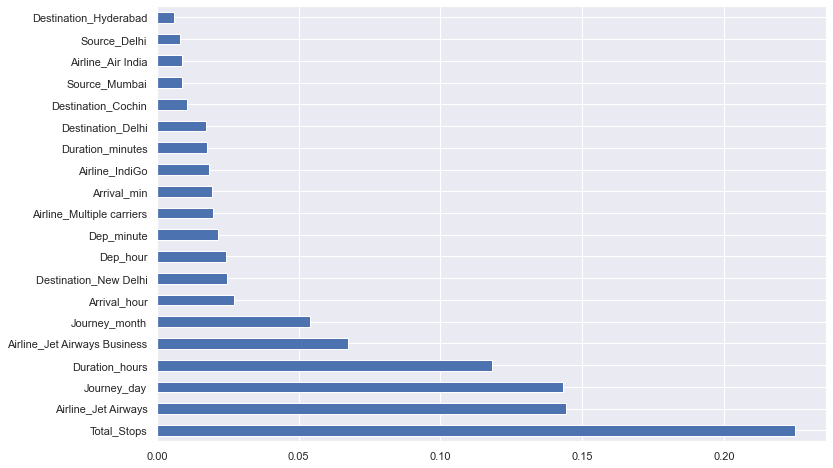

In [119]:
# Plotting the feature importance

plt.figure(figsize = (12,8))
features_important = pd.Series(selection.feature_importances_, index = X.columns)
features_important.nlargest(20).plot(kind='barh')
plt.show()

It can be seen that the 'Total_Stops' feature has the most importance for predicting the flight ticket price.

## Model Training

After selecting the most important features, we use different machine learning algorithms to train ticket price prediction models.

###### Training steps:
1. Split dataset into train and test sets
2. If needed apply feature scaling
3. Import model
4. Fit the data
5. Predict test set labels
6. In regression, check RMSE score to evaluate the performance of the model
7. Create some visualizations for better illustrating the results

#### Using Random Forest

In [126]:
# RF doesn't need feature scaling
# Splitting the dataset
from sklearn.model_selection import train_test_split
# Selecting 80% of the training dataset for trainig the model and 20% of the training data for model validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [127]:
# Importing the model and fitting it over the data

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [128]:
# Predicting the price of the splitted training data
y_pred = reg_rf.predict(X_test)

In [131]:
# Evaluating the performance of the trained model
reg_rf.score(X_train, y_train)

0.952863262172422

In [132]:
# Validating the model performance
reg_rf.score(X_test,y_test)

0.7992073574045528

C:\Users\shahr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


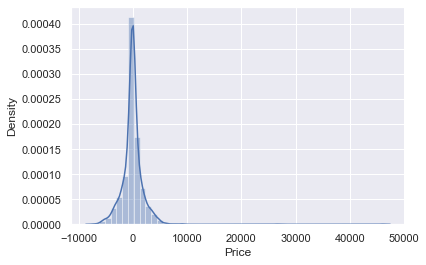

In [135]:
# Plotting the y_test and y_pred results for better illustration 
# (just in regression problem that you are dealing with continuous variables)

sns.distplot(y_test - y_pred)
plt.show()

The gaussian distribution with the center of zero demonstrates that the achieved results are reliable.

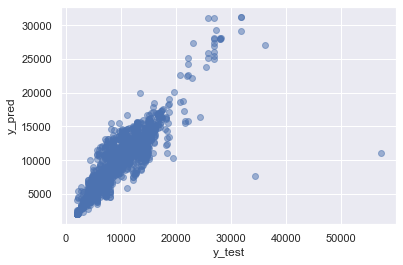

In [136]:
# It is also feasible to plot the scatter plot to see the results (just in regression problems)

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [138]:
# Evaluating the performance of the model using different metrics
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(y_test,y_pred))
print('MSE', metrics.mean_squared_error(y_test,y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Checking the r2 score
metrics.r2_score(y_test,y_pred)

MAE 1170.1117551167051
MSE 4329502.26912032
RMSE 2080.7456041333644


0.7992073574045528

### Hyperparameter Tuning

###### Steps:
1. Choose a method for hyperparameter tuning
    * RandomizedSearchCV
    * GridSearchCV
2. Assign hyperparameters in form of dictionary
3. Fit the model based on different combinations of hyperparameters
4. Check best parameters and best scores

In [139]:
# Importing the appropriate library
from sklearn.model_selection import RandomizedSearchCV

In [149]:
# Using RandomizedSearchCV (faster option)

# Random Forest (RF) Hyperparameter Tuning
# Number of trees in RF
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200, num=12)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [150]:
# Creating the random grid

random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf}

In [151]:
# Random search of parameters, using 5 fold cross validation
# Search across multiple combinations of hyperparameters
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error',n_iter = 10, cv = 5, verbose = 2,
                               random_state = 42, n_jobs=1)

In [152]:
# Fitting the model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [153]:
# Determining the best parameters for the model
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [154]:
# Predicting the lables of the X_test
prediction = rf_random.predict(X_test)

C:\Users\shahr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


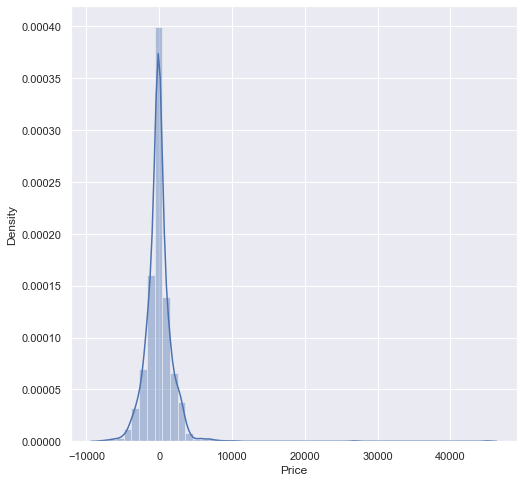

In [155]:
# Plotting the predictions of the X_test
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

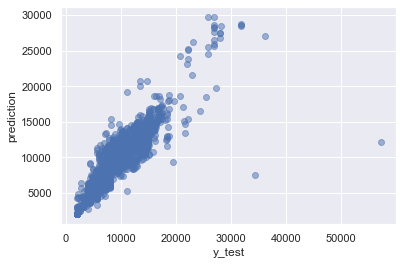

In [156]:
# Plotting the scatter plot

plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()

In [157]:
# Evaluating the performance of the model using different metrics

print('MAE', metrics.mean_absolute_error(y_test,prediction))
print('MSE', metrics.mean_squared_error(y_test,prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

# Checking the r2 score
metrics.r2_score(y_test,prediction)

MAE 1165.1470093967173
MSE 4049835.7260274836
RMSE 2012.4203651393225


0.8121776668633705

## Saving the Model for Reuse Later

In [160]:
import pickle
# Open a file where you want to store the model
file = open(r'C:\Users\shahr\OneDrive\Desktop\GithubRepositories\Prediction-of-Flight-Price\flight_ticket_price_prediction_RFmodel.pkl','wb')

# Send information to the file
pickle.dump(rf_random,file)

## Loading the Saved Random Forest Model

In [161]:
# Loading the model
model = open(r'C:\Users\shahr\OneDrive\Desktop\GithubRepositories\Prediction-of-Flight-Price\flight_ticket_price_prediction_RFmodel.pkl','rb')
rf_model = pickle.load(model)

## Making Predictions by the Loaded Model based on the Test Set

In [163]:
y_prediction = rf_model.predict(X_test)
metrics.r2_score(y_test,y_prediction)

0.8121776668633705

# Feel free to directly send me messages on LinkedIn (Shahrad Shakerian) and ask your questions for getting a job as a data scientist with any kind of background and experience you have.

# Reference of the codes and training for this repository:
### Krish Naik (Awsome YouTube channel for data scientist)